In [1]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt

# For statistical graphics
import seaborn as sns

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For creating and training linear regression models
from sklearn.linear_model import LinearRegression

# For evaluating regression model performance
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv('day.csv')

In [3]:
# Check for missing values 
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
# Check the data types of the variables
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [5]:
# Convert 'dteday' to datetime with the correct format
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

# Convert 'season' and 'weathersit' to categorical string values
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'
})

# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Drop columns that are not useful for modeling
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

# Display the final dataframe to ensure preprocessing is done
print("\nPreprocessed Duplicated Dataset:")
print(df.head())


Preprocessed Duplicated Dataset:
   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        1           1  14.110847  18.18125  80.5833   
1   0     1        0        2           1  14.902598  17.68695  69.6087   
2   0     1        0        3           1   8.050924   9.47025  43.7273   
3   0     1        0        4           1   8.200000  10.60610  59.0435   
4   0     1        0        5           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_spring  season_summer  season_winter  \
0  10.749882   985           True          False          False   
1  16.652113   801           True          False          False   
2  16.636703  1349           True          False          False   
3  10.739832  1562           True          False          False   
4  12.522300  1600           True          False          False   

   weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
0      

In [35]:
# Print the column headers of the dataframe
print(df.columns.tolist())

['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist']


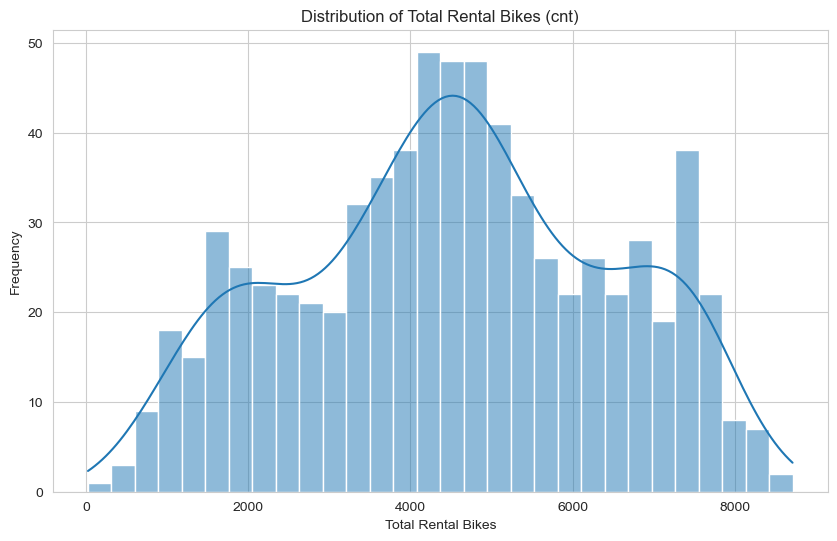

In [6]:
# Setting the style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Rental Bikes (cnt)')
plt.xlabel('Total Rental Bikes')
plt.ylabel('Frequency')
plt.show()

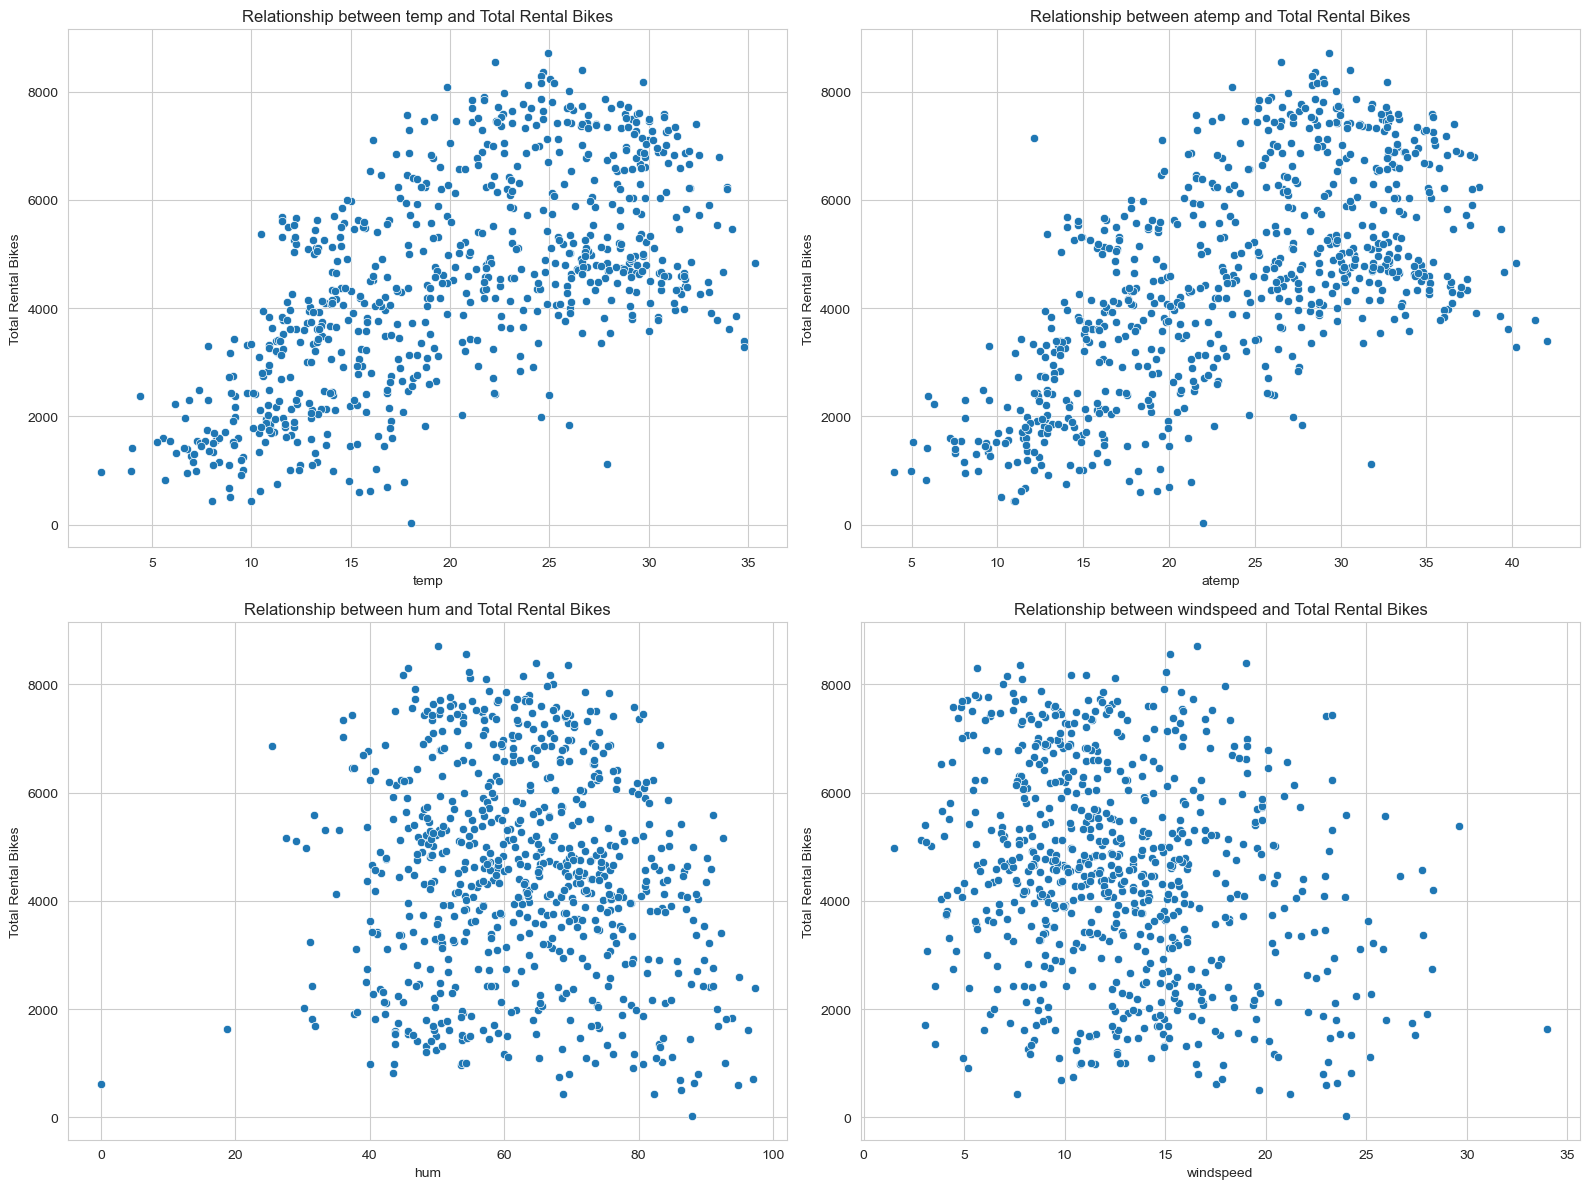

In [7]:
# Setting the style of the plots
sns.set_style("whitegrid")

# Plotting the relationships between numerical features and the target variable 'cnt'
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['cnt'])
    plt.title(f'Relationship between {feature} and Total Rental Bikes')
    plt.xlabel(feature)
    plt.ylabel('Total Rental Bikes')

plt.tight_layout()
plt.show()

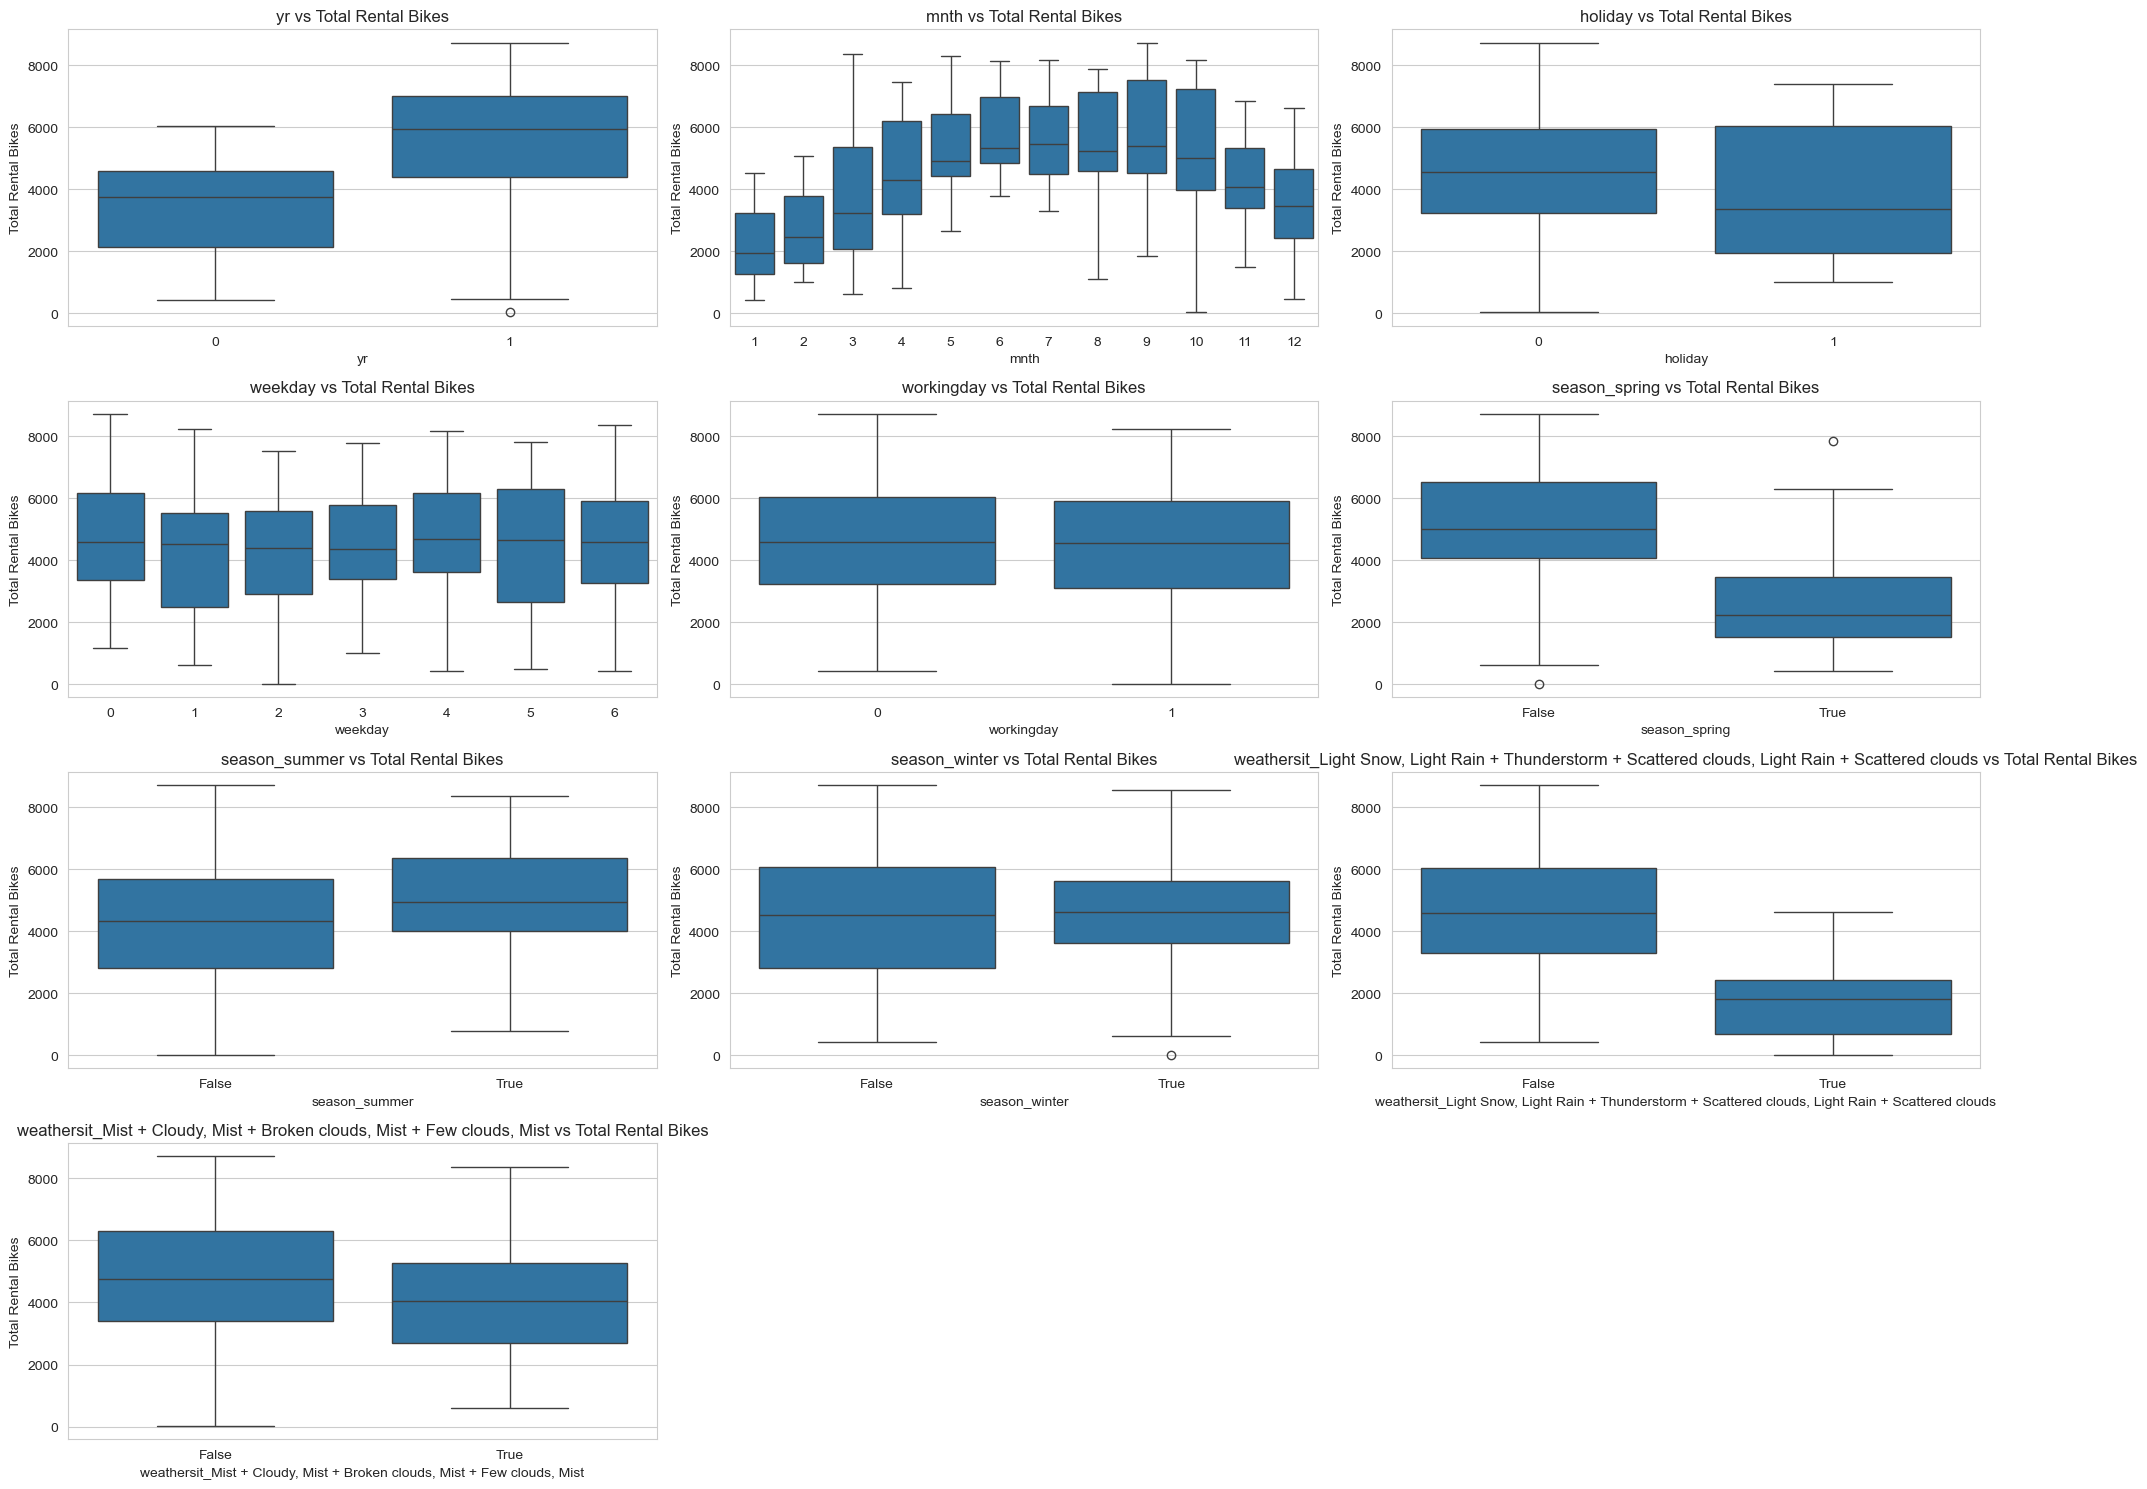

In [8]:
# Setting the style of the plots
sns.set_style("whitegrid")

# Box plots to visualize the impact of categorical features on 'cnt'
categorical_features = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'season_spring', 'season_summer', 'season_winter',
                        'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                        'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature], y=df['cnt'])
    plt.title(f'{feature} vs Total Rental Bikes')
    plt.xlabel(feature)
    plt.ylabel('Total Rental Bikes')

plt.tight_layout()
plt.show()

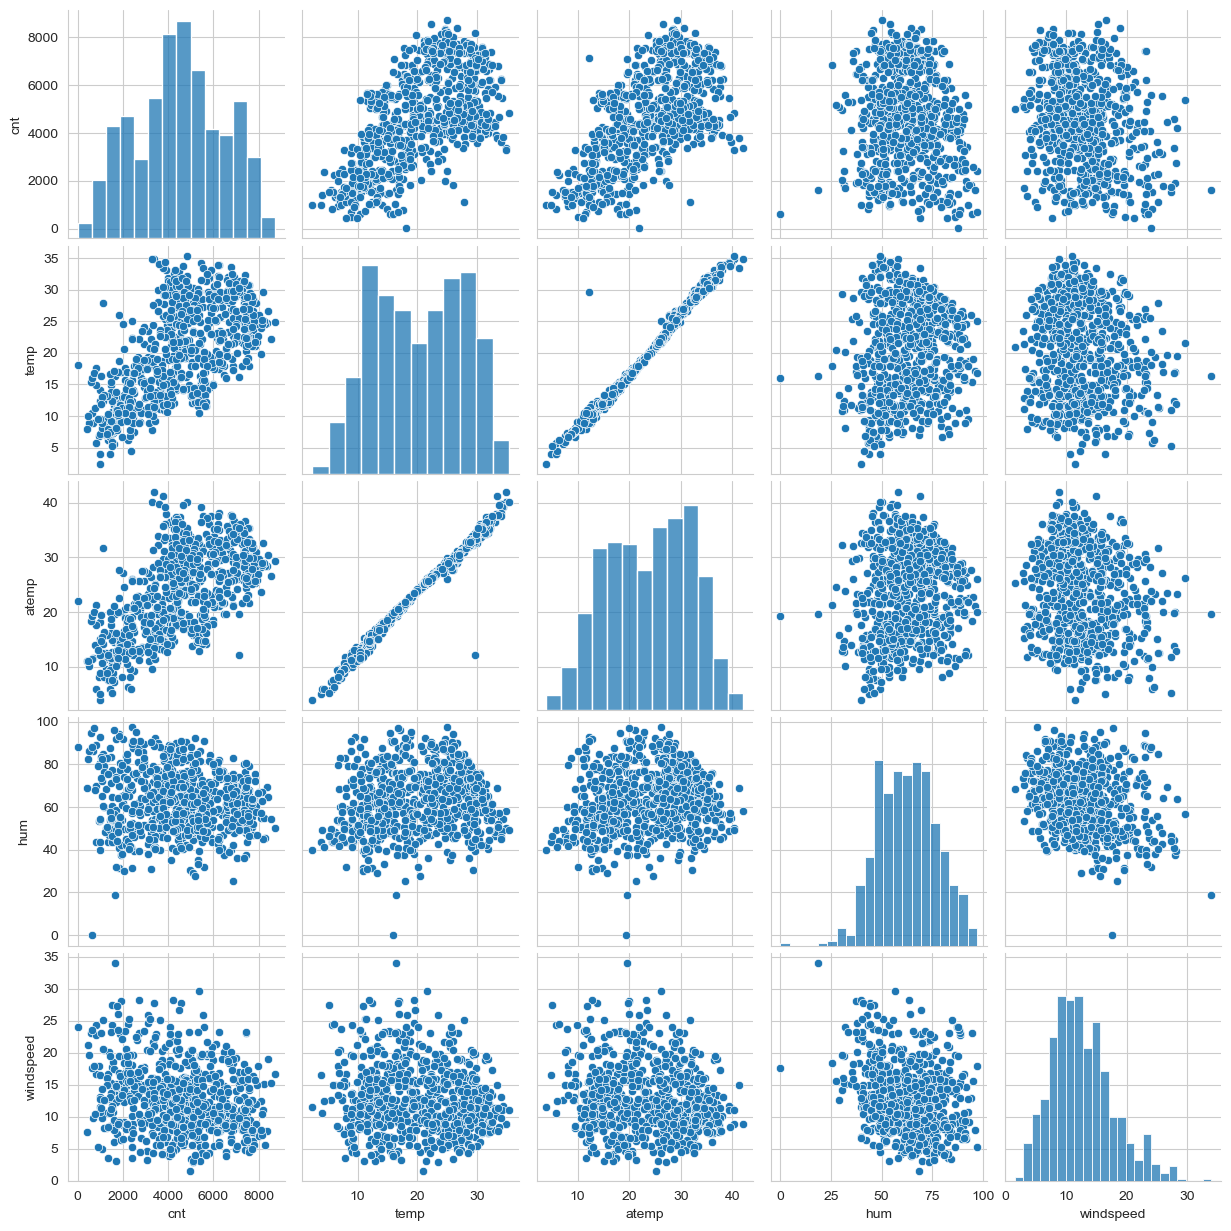

In [9]:
# Pair plot to visualize relationships between numerical variables
sns.pairplot(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

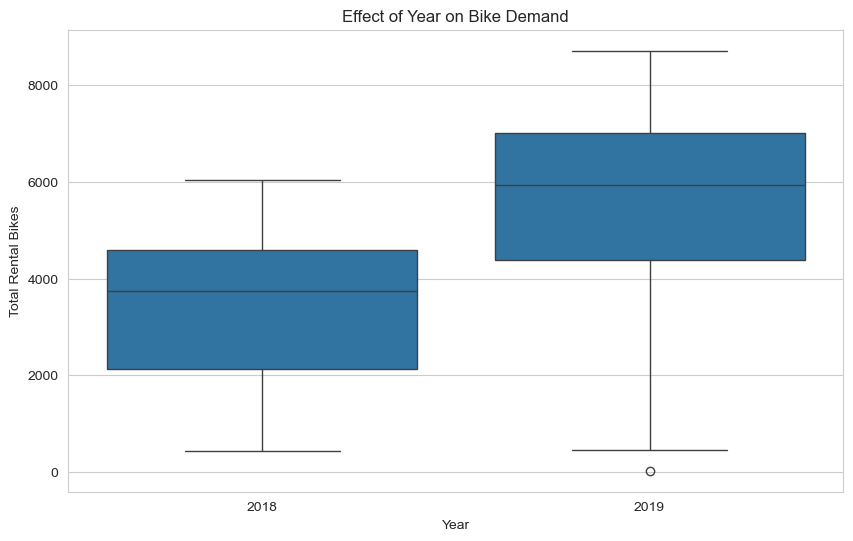

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Effect of Year on Bike Demand')
plt.xlabel('Year')
plt.ylabel('Total Rental Bikes')
plt.xticks([0, 1], ['2018', '2019'])
plt.show()

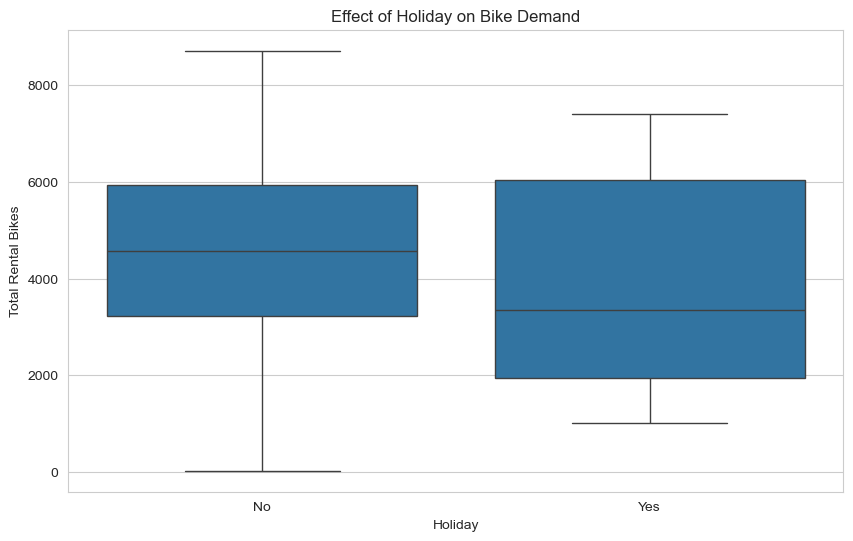

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Effect of Holiday on Bike Demand')
plt.xlabel('Holiday')
plt.ylabel('Total Rental Bikes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

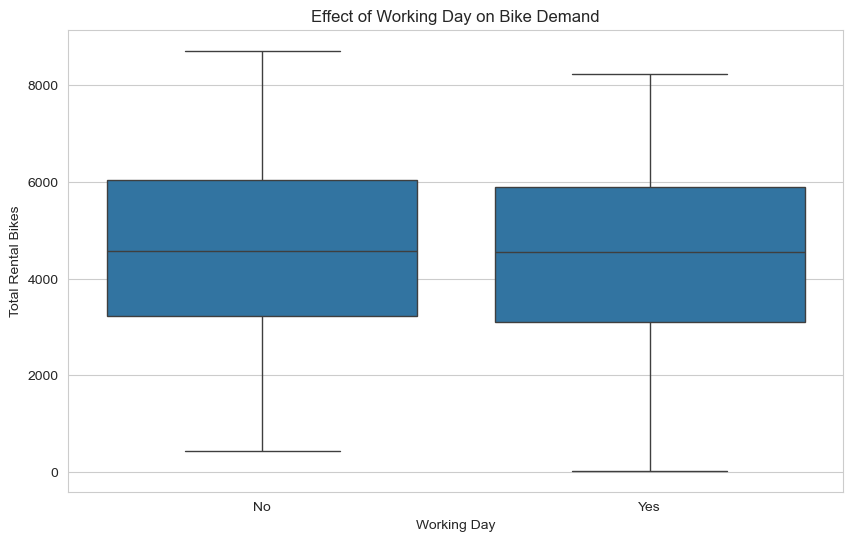

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Effect of Working Day on Bike Demand')
plt.xlabel('Working Day')
plt.ylabel('Total Rental Bikes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [37]:
# Defining the features and target variable
X = df.drop('cnt', axis=1)
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f'Training set: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set: X_train: (584, 14), y_train: (584,)
Testing set: X_test: (146, 14), y_test: (146,)


In [43]:
# Initialize the model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the target variable on the training set
y_train_pred = model.predict(X_train)

In [45]:
# Evaluate the model's performance on the training set
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

print(f'Training R-squared: {train_r2}')
print(f'Training RMSE: {train_rmse}')

Training R-squared: 0.8178560449735238
Training RMSE: 833.6697938782049


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
# Predict the target variable on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model's performance on the testing set
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Testing R-squared: {test_r2}')
print(f'Testing RMSE: {test_rmse}')

Testing R-squared: 0.8488458395217611
Testing RMSE: 719.2890963567427


C:\Users\anast\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
# Create a DataFrame to store the coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

                                                    Coefficient
yr                                                  1987.340819
mnth                                                 -29.287331
holiday                                             -781.259209
weekday                                               21.285429
workingday                                          -181.841445
temp                                                  96.678473
atemp                                                 25.515549
hum                                                  -10.815680
windspeed                                            -43.048160
season_spring                                      -1005.157336
season_summer                                        243.809009
season_winter                                        794.971148
weathersit_Light Snow, Light Rain + Thunderstor... -2038.444457
weathersit_Mist + Cloudy, Mist + Broken clouds,...  -435.509727


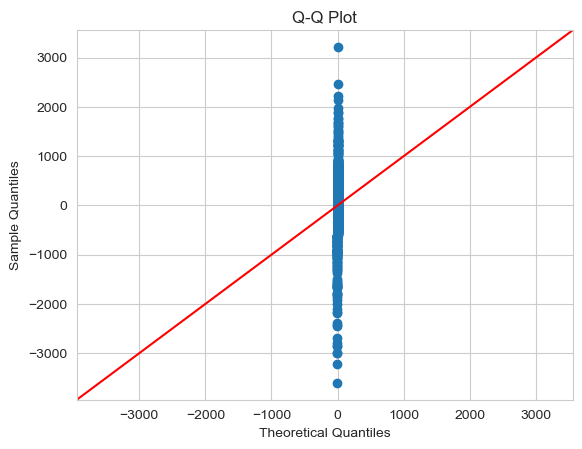

In [51]:
# Q-Q plot for normality of residuals
import statsmodels.api as sm
sm.qqplot(y_train - y_train_pred, line='45')
plt.title('Q-Q Plot')
plt.show()

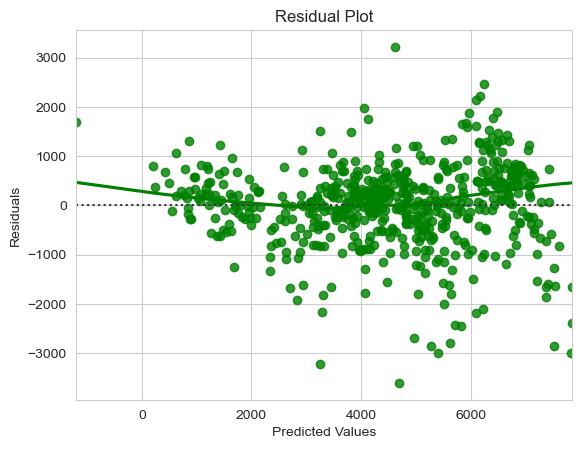

In [61]:
# Residual plot for linearity and homoscedasticity
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()